# New York City Taxi Fare Prediction

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [2]:
file = 'data/train.csv'
train = pd.read_csv(file, nrows=2000000)

In [3]:
train.shape

(2000000, 8)

In [4]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [5]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


We will add a travel vector feature that contains the distance between pickup and dropoff locations 

In [6]:
def add_travel_vector(df):
    df['diff_longitude'] = abs(df['pickup_longitude'] - df['dropoff_longitude'])
    df['diff_latitude'] = abs(df['pickup_latitude'] - df['dropoff_latitude'])

In [7]:
add_travel_vector(train)

## Explore the data

In [8]:
print('NaNs in dropoff_longitude:', train['dropoff_longitude'].isnull().sum())
print('NaNs in dropoff_latitude:', train['dropoff_latitude'].isnull().sum())

NaNs in dropoff_longitude: 14
NaNs in dropoff_latitude: 14


Since there are so few Nans, we can drop those rows

In [9]:
train.dropna(inplace=True)

In [10]:
train.shape

(1999986, 10)

We'll plot a scatter plot of diff_latitude and diff_longitude features to see what values aren't normal

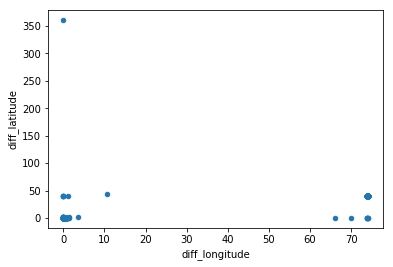

In [11]:
train.iloc[:50000].plot.scatter('diff_longitude', 'diff_latitude')

We'll remove outliers (instances where difference in latitude or longitude is greater than 10)

In [12]:
train = train[(train['diff_longitude'] < 10) & (train['diff_latitude'] < 10)]

In [13]:
train.shape

(1995974, 10)

# Train the model

We will create the input vector that will 

In [27]:
def create_input_vector(df):
    return np.column_stack((df['diff_longitude'], df['diff_latitude'], np.ones(len(df))))

X = create_input_vector(train)
y = np.array(train['fare_amount'])

In [28]:
print(X.shape)
print(y.shape)

(1995974, 3)
(1995974,)


In [29]:
w, _, _, _ = np.linalg.lstsq(X, y, rcond = None)

In [30]:
print(w)

[118.6868145   58.99908686   7.41226139]


# Predictions

In [31]:
test = pd.read_csv('data/test.csv')

In [32]:
test.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

We can use the previously defined functions to create the features and the test vector

In [34]:
add_travel_vector(test)
X = create_input_vector(test)

Now we can make predictions based on our calculated weights vector w 

In [35]:
predictions = np.matmul(X, w).round(decimals=2)

Create the submission file

In [37]:
submission = pd.DataFrame(
    {'key': test.key, 'fare_amount': predictions},
    columns = ['key', 'fare_amount'])
submission.to_csv('output/submission.csv', index = False)